In [15]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statistics import mean
from datetime import date

In [16]:
start_date = '2023-4-10' # start of MAGS history
# start_date = '2021-1-1'
history_map = {}
for symbol in ['SMH','USD','SOXL','SPY','QQQ','TQQQ','NVDA','FNGU','FNGS','MAGS','MAGX','MAG7.L','NVD3.L','QQQ5.L','IYW','IGM','XLKS.MI']:
    tickerData = yf.Ticker(symbol)
    history = tickerData.history(interval='1wk', start=start_date, end=date.today()) # prices are adjusted for splits
    print(f'{symbol} history: {len(history)}w')
    history_map[symbol] = history

SMH history: 76w
USD history: 76w
SOXL history: 76w
SPY history: 76w
QQQ history: 76w
TQQQ history: 76w
NVDA history: 76w
FNGU history: 76w
FNGS history: 76w
MAGS history: 76w
MAGX history: 30w
MAG7.L history: 24w
NVD3.L history: 76w
QQQ5.L history: 76w
IYW history: 76w
IGM history: 76w
XLKS.MI history: 76w


In [17]:
rows = []
for symbol in history_map:
    history = history_map[symbol]
    C2L = (history['Low'].shift(-1) / history['Close'] - 1) * 100
    rows.append({
        'symbol': symbol,
        'C2L 25%': C2L.quantile(0.25),
        'C2L 50%': C2L.quantile(0.5),
        'C2L 75%': C2L.quantile(0.75),
    })
C2L = pd.DataFrame(rows)
print(C2L)

     symbol    C2L 25%    C2L 50%   C2L 75%
0       SMH  -3.996836  -2.162314 -0.594720
1       USD  -8.049627  -4.328551 -1.449194
2      SOXL -11.681866  -7.097679 -2.940980
3       SPY  -1.869427  -0.703514 -0.184920
4       QQQ  -2.178852  -1.094404 -0.336314
5      TQQQ  -6.603916  -3.444692 -1.068428
6      NVDA  -5.004196  -3.046205 -0.617778
7      FNGU -10.014831  -4.999999 -1.714333
8      FNGS  -3.450423  -1.587683 -0.488345
9      MAGS  -2.632751  -1.549593 -0.413362
10     MAGX  -7.295818  -2.899854 -0.813006
11   MAG7.L -21.324407 -10.955871 -3.886143
12   NVD3.L -17.356753 -10.897972 -4.173111
13   QQQ5.L  -9.293914  -4.010482  0.565363
14      IYW  -2.717908  -1.168455 -0.505348
15      IGM  -2.605785  -1.245085 -0.365753
16  XLKS.MI  -2.345692  -1.212869 -0.254492


In [18]:
max_weeks = 26

df = pd.DataFrame()
for symbol in history_map:
    history = history_map[symbol]
    value = [None] # week 0
    for weeks in range(1, max_weeks+1):
        if len(history) <= weeks:
            value.append(None)
        else:
            stock_changes = history['Close'].pct_change(periods=weeks) * 100
            # value.append(stock_changes.median())
            value.append(stock_changes.mean() / stock_changes.std())
    df[symbol] = value

# Plot median stock change over number of weeks
def plot(title, symbols):
  df[symbols].plot(figsize=(16,9), marker='.')
  plt.legend()
  plt.title(title)
  plt.xlabel('weeks')
  plt.ylabel('median stock change %')
  plt.grid()


In [19]:
print(f'USD:SMH {(df.USD / df.SMH).median():.1f}')
print(f'NVD3.L:NVDA {(df["NVD3.L"] / df.NVDA).median():.1f}')
print(f'TQQQ:QQQ {(df.TQQQ / df.QQQ).median():.1f}')
print(f'QQQ5.L:QQQ {(df["QQQ5.L"] / df.QQQ).median():.1f}')
print(f'FNGU:FNGS {(df.FNGU / df.FNGS).median():.1f}')
print(f'MAGX:MAGS {(df.MAGX / df.MAGS).median():.1f}')
print(f'MAG7.L:MAGS {(df["MAG7.L"] / df.MAGS).median():.1f}')

USD:SMH 1.0
NVD3.L:NVDA 0.7
TQQQ:QQQ 0.8
QQQ5.L:QQQ 0.6
FNGU:FNGS 0.8
MAGX:MAGS 0.9
MAG7.L:MAGS 0.5


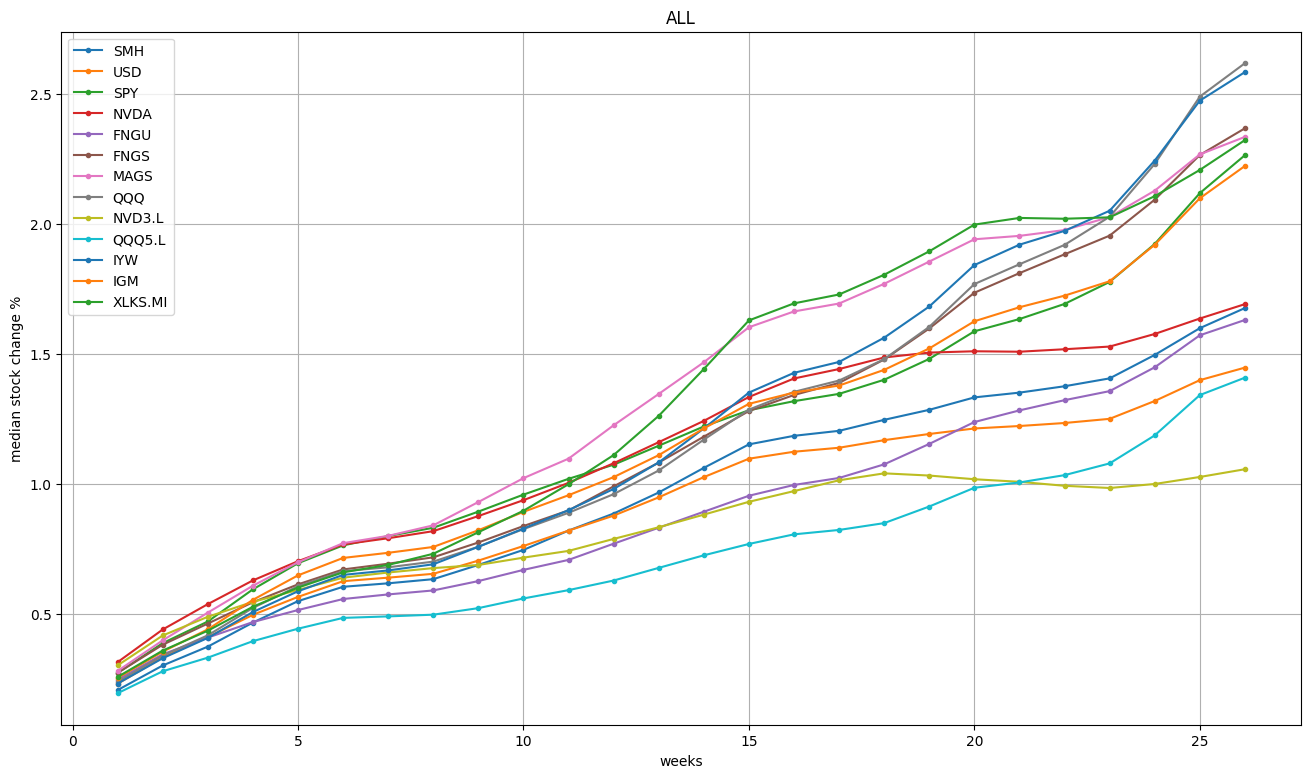

In [31]:
plot(title='ALL', symbols = ['SMH','USD','SPY','NVDA','FNGU','FNGS','MAGS','QQQ',
                            #  'MAGX','MAG7.L','SOXL','TQQQ',
                            'NVD3.L','QQQ5.L','IYW','IGM','XLKS.MI'])

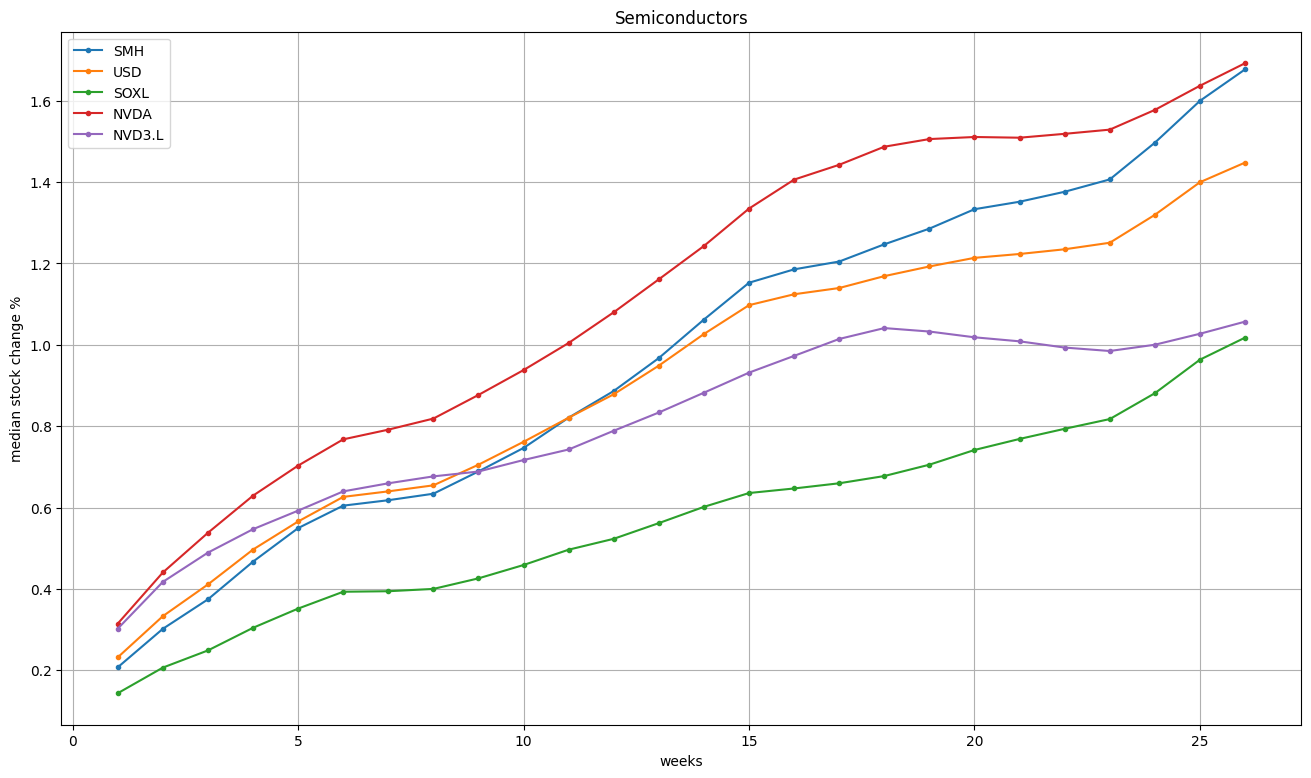

In [21]:
plot(title='Semiconductors', symbols = ['SMH','USD','SOXL','NVDA','NVD3.L'])

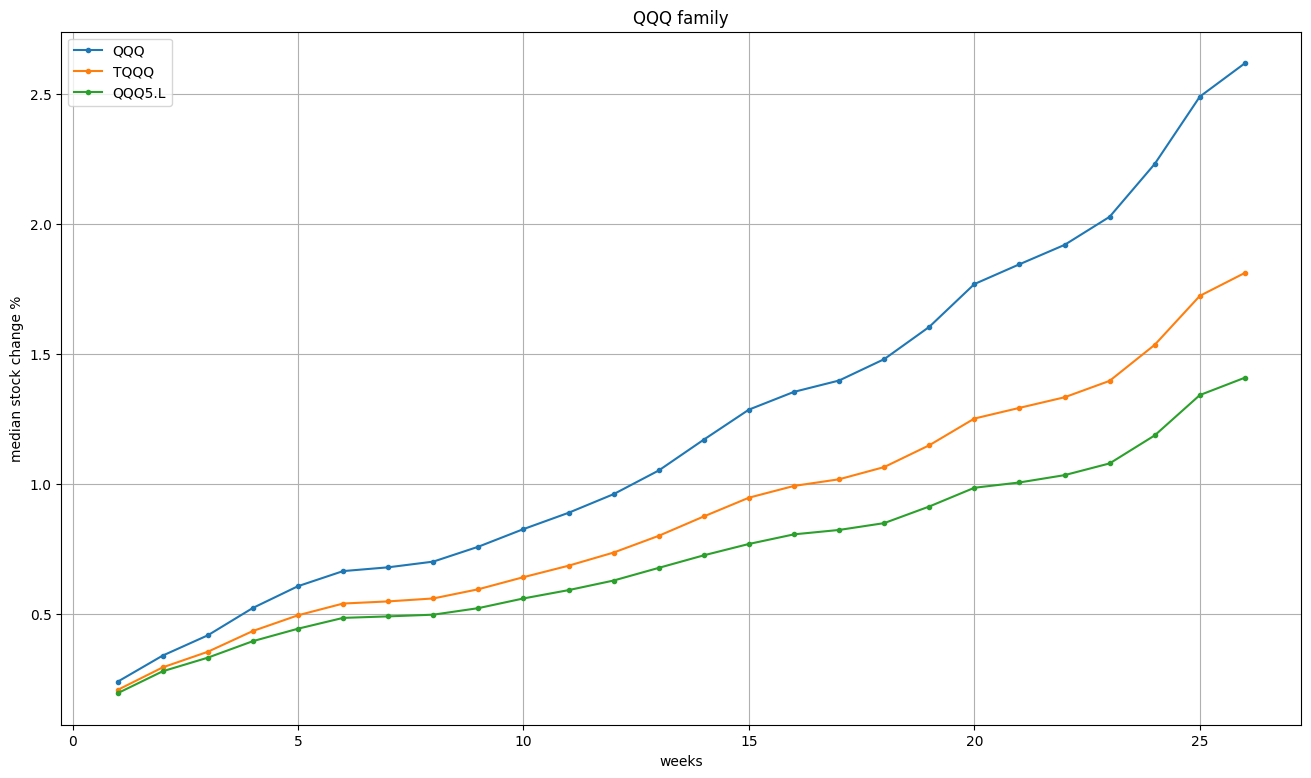

In [22]:
plot(title='QQQ family', symbols = ['QQQ','TQQQ','QQQ5.L'])


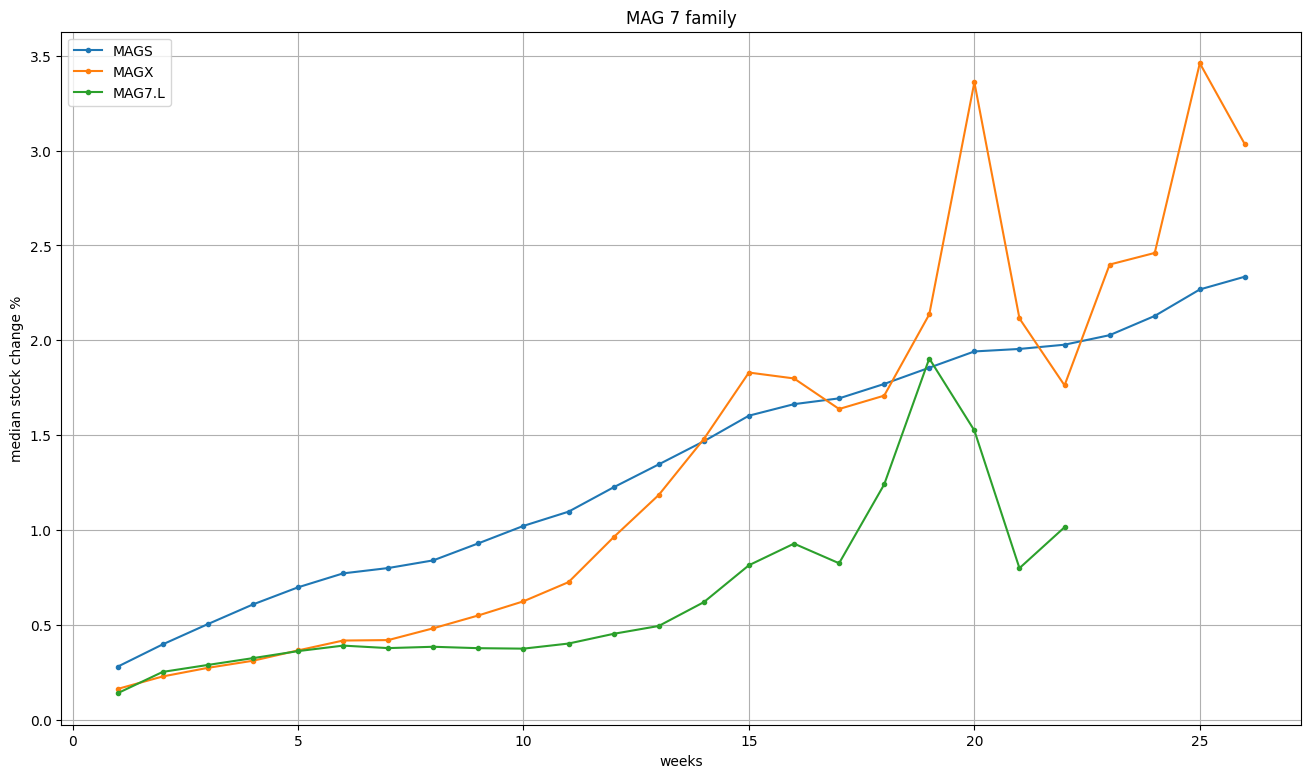

In [23]:
plot(title='MAG 7 family', symbols = ['MAGS','MAGX','MAG7.L'])


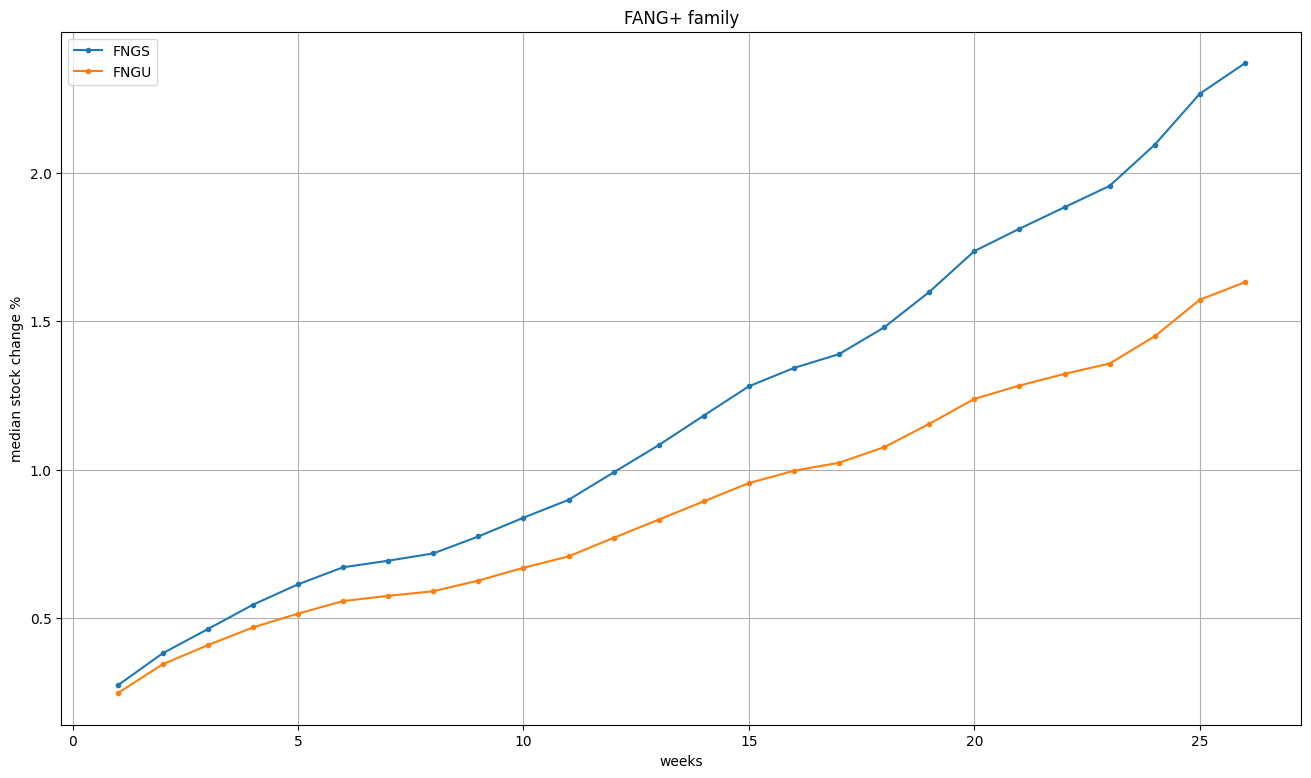

In [24]:
plot(title='FANG+ family', symbols = ['FNGS','FNGU'])


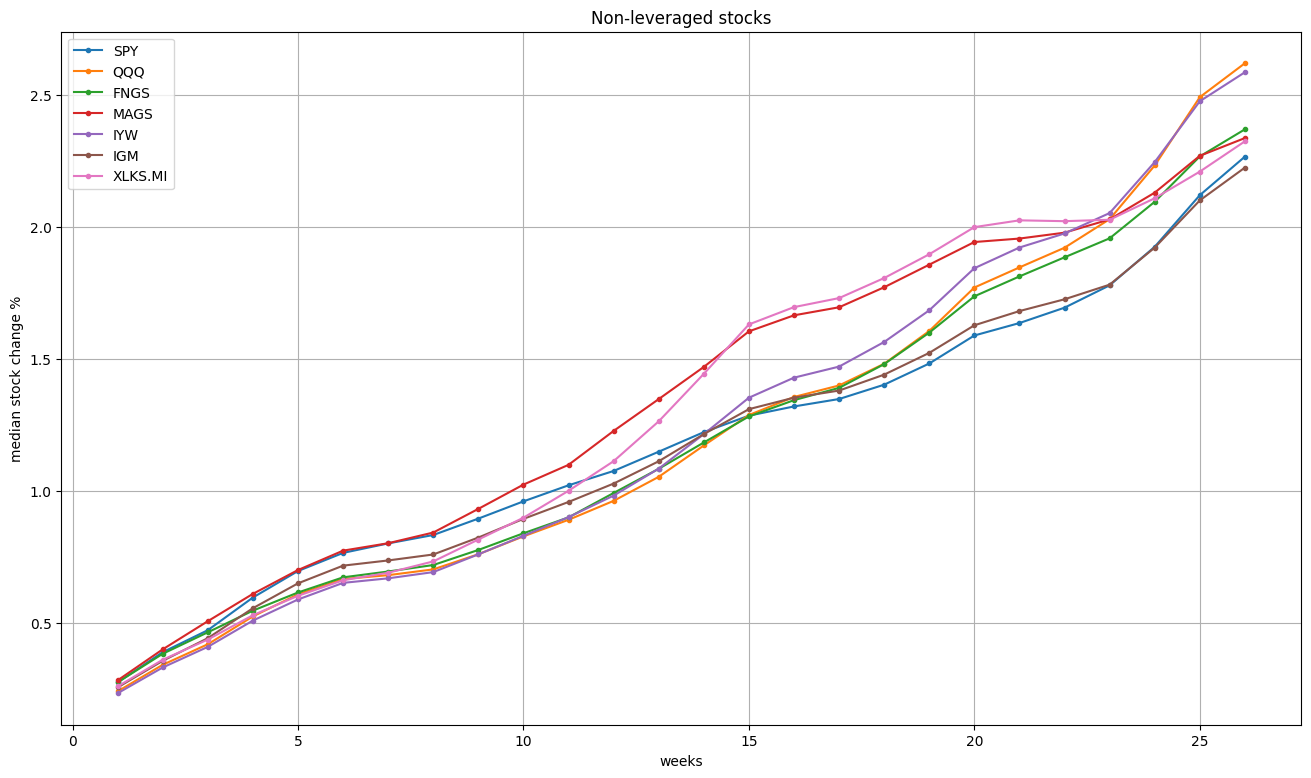

In [25]:
plot(title='Non-leveraged stocks', symbols = ['SPY','QQQ','FNGS','MAGS','IYW','IGM','XLKS.MI'])


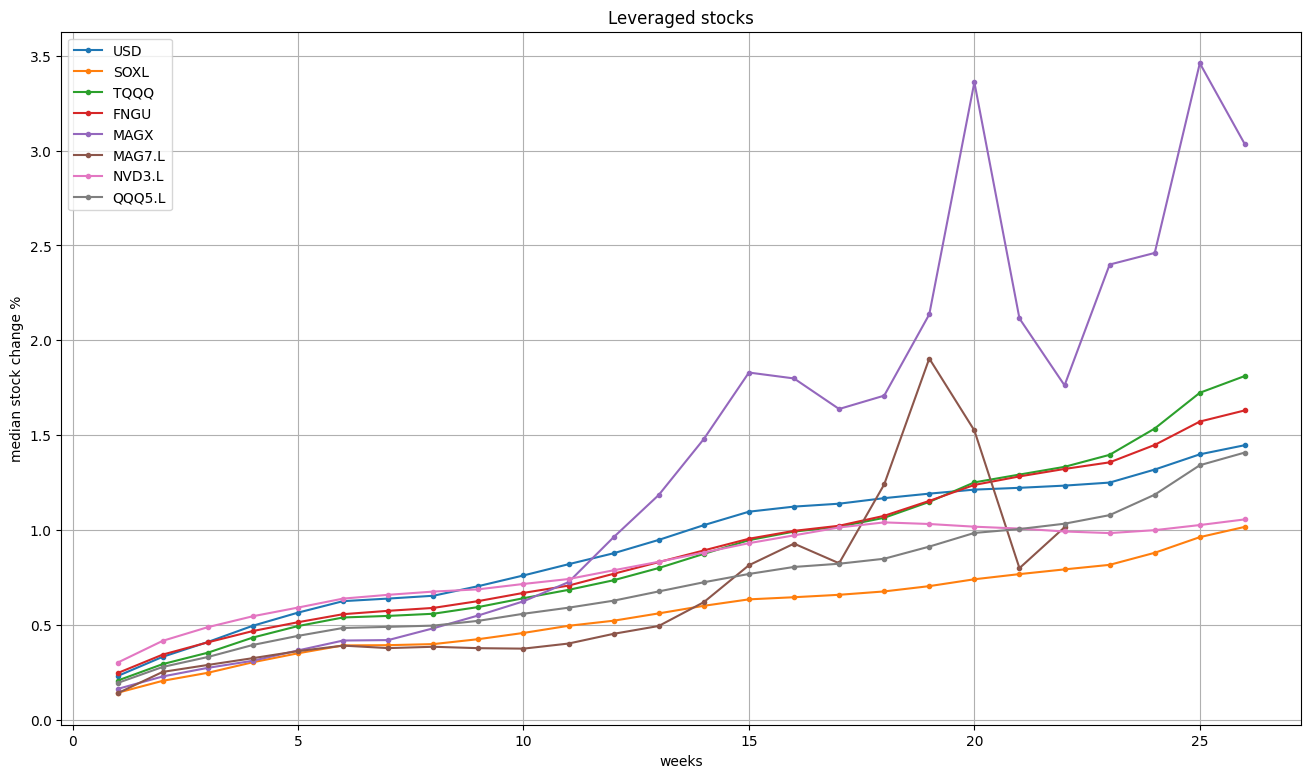

In [26]:
plot(title='Leveraged stocks', symbols = ['USD','SOXL','TQQQ','FNGU','MAGX','MAG7.L','NVD3.L','QQQ5.L'])


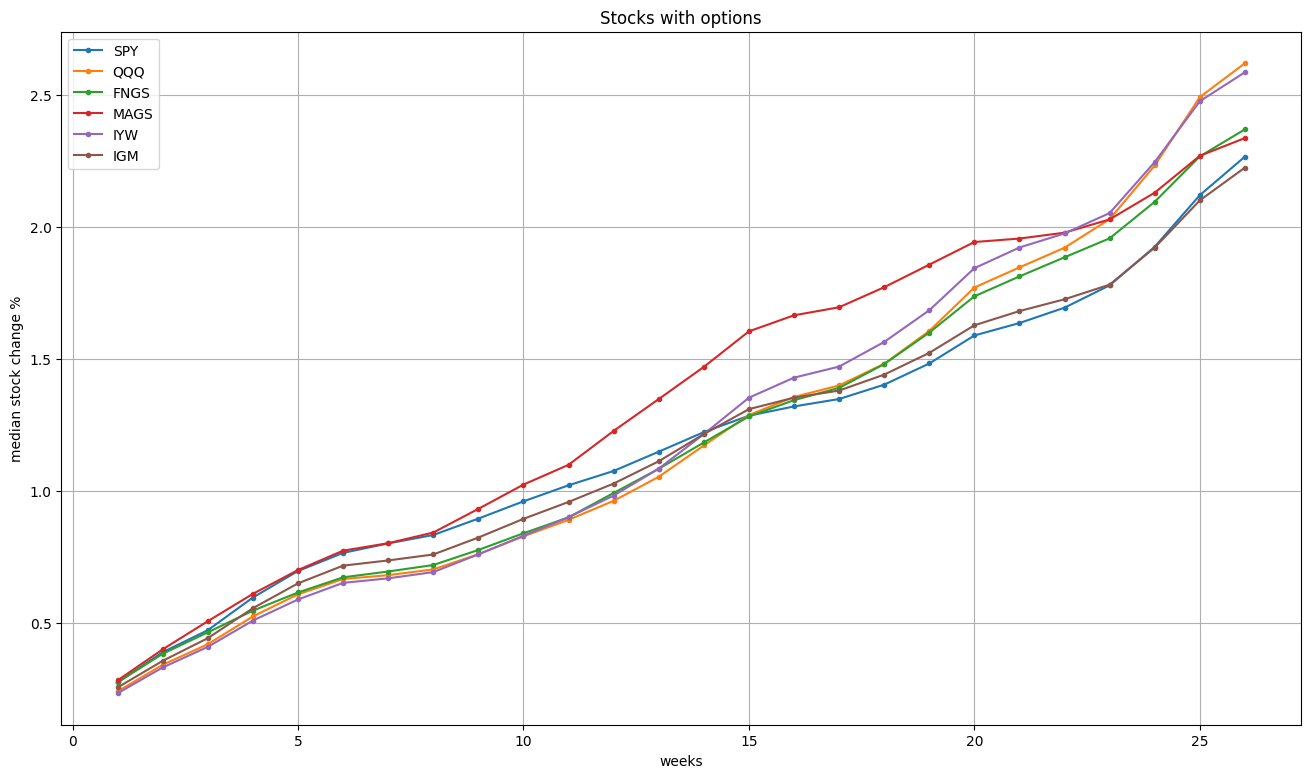

In [27]:

plot(title='Stocks with options', symbols = ['SPY','QQQ','FNGS','MAGS','IYW','IGM'])
